In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### 1.1 Створити не менше двох об’єктів TimeSeries, у яких індекси створені за допомогою date_range(). Виділити підмасиви у цих об’єктів. Провести об’єднання об’єктів TimeSeries за допомогою merge_asof().

In [4]:
data1 = pd.date_range('11-11-2011', periods = 50, freq='M')
data2 = pd.date_range('11-11-2011', periods = 50, freq='W')

data1 = pd.Series(np.linspace(1,100,50), index = data1).rename('data1')
print("by month 2011 only\n", data1.loc['2011'])

data2 = pd.Series(np.random.random(50), index = data2).rename('data2')
print("by week 2011-11 only\n", data2.loc['2011-11'])

pd.merge_asof(data1, data2, left_index=True, right_index=True)

by month 2011 only
 2011-11-30    1.000000
2011-12-31    3.020408
Freq: M, Name: data1, dtype: float64
by week 2011-11 only
 2011-11-13    0.694832
2011-11-20    0.838539
2011-11-27    0.720384
Freq: W-SUN, Name: data2, dtype: float64


,data1,data2
2011-11-30,1.000000,0.720384
2011-12-31,3.020408,0.811380
2012-01-31,5.040816,0.184204
2012-02-29,7.061224,0.122145
2012-03-31,9.081633,0.310066
2012-04-30,11.102041,0.693113
2012-05-31,13.122449,0.592487
2012-06-30,15.142857,0.707796
2012-07-31,17.163265,0.991979
2012-08-31,19.183673,0.765136


#### 2.1 Побудувати графік зміни середніх денних температур: 
    а) загальний;
    б) за 2014 рік; 
    в) за квітень 2013 року; 
    г) за листопад 2013 – травень 2015; 
    д) за перші два тижня 2015-го року.

In [5]:
dataset = pd.read_csv('Delhi_Climate.csv', index_col=0, parse_dates=True)
dataset.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


Text(0.5, 1.0, 'Global Plot')

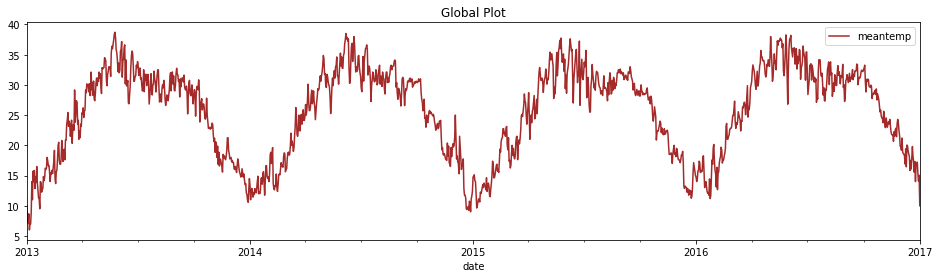

In [6]:
#а
fig, ax = plt.subplots(figsize=(16,4))
dataset.plot(ax = ax, color="brown", y = 'meantemp').set_title('Global Plot')

Text(0.5, 1.0, '2014 year plot')

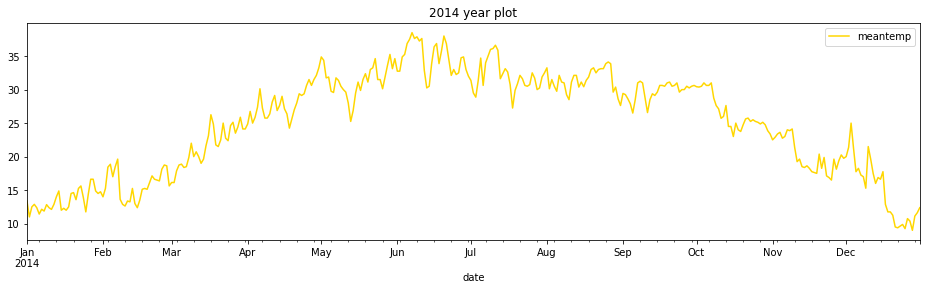

In [7]:
#б
fig, ax = plt.subplots(figsize=(16,4))
dataset.loc['2014'].plot(ax = ax, color="gold",y = 'meantemp').set_title('2014 year plot')

Text(0.5, 1.0, '2013 year april plot')

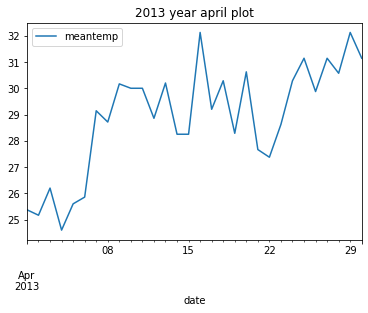

In [8]:
#в
dataset.loc['2013-4'].plot(y = 'meantemp').set_title('2013 year april plot')

Text(0.5, 1.0, 'November 2013 - May 2015 Plot')

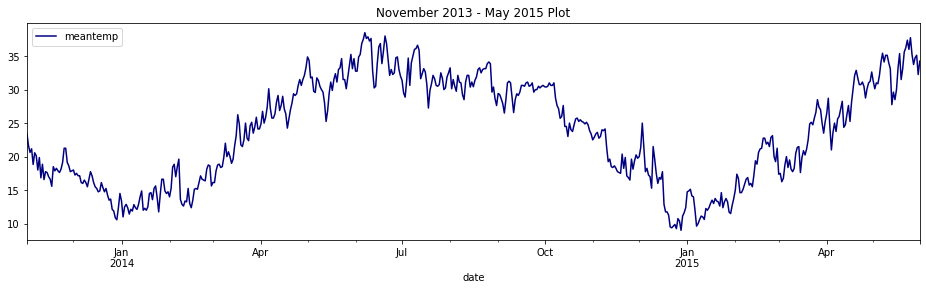

In [9]:
#г
fig, ax = plt.subplots(figsize=(16,4))
dataset.loc['2013-11':'2015-05'].plot(ax = ax, color="navy", y = 'meantemp').set_title('November 2013 - May 2015 Plot')

days of week <PandasArray>
[3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6]
Length: 11, dtype: int64


Text(0.5, 1.0, '2015 Plot')

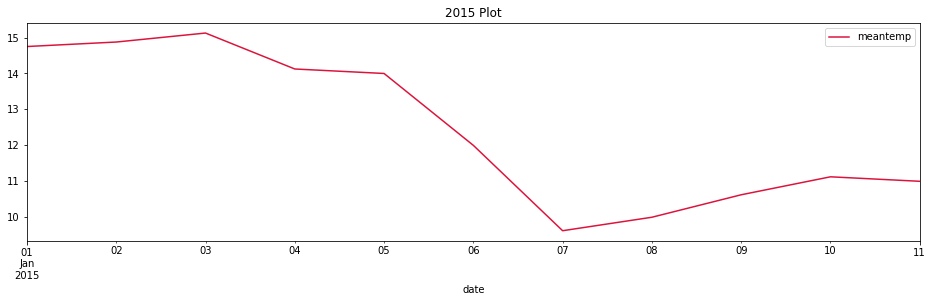

In [17]:
#д 
fig, ax = plt.subplots(figsize=(16,4))
print("days of week", pd.Series(dataset.loc['2015'].first('2W').index).dt.dayofweek.array)
dataset.loc['2015'].first('2W').plot(ax = ax, color="crimson", y = 'meantemp').set_title('2015 Plot')

#### 2.2 Знайти середні значення вологості 
    а) за 2016 рік; 
    б) за кожний місяць; 
    в) за кожні два тижні весни та літа 2014 року.

In [11]:
#а
dataset.loc['2016'].resample('A').mean()['humidity']

date
2016-12-31    58.740174
Freq: A-DEC, Name: humidity, dtype: float64

In [12]:
#б
dataset.resample('M').mean()['humidity']

date
2013-01-31     73.028802
2013-02-28     71.938563
2013-03-31     57.417243
2013-04-30     34.612103
2013-05-31     28.938249
2013-06-30     58.758135
2013-07-31     74.873387
2013-08-31     76.757104
2013-09-30     64.552738
2013-10-31     70.255607
2013-11-30     66.245952
2013-12-31     79.134409
2014-01-31     84.572581
2014-02-28     73.336097
2014-03-31     62.323733
2014-04-30     40.657738
2014-05-31     41.742512
2014-06-30     42.675000
2014-07-31     62.846368
2014-08-31     61.418262
2014-09-30     63.385714
2014-10-31     59.094662
2014-11-30     55.333333
2014-12-31     69.948157
2015-01-31     78.189516
2015-02-28     64.376913
2015-03-31     68.015553
2015-04-30     51.632143
2015-05-31     33.320276
2015-06-30     49.322024
2015-07-31     69.376152
2015-08-31     70.710685
2015-09-30     53.948690
2015-10-31     59.313748
2015-11-30     66.825000
2015-12-31     71.646313
2016-01-31     77.932892
2016-02-29     62.385095
2016-03-31     55.037324
2016-04-30     29.24

In [13]:
#в
dataset.loc['2014-03':'2014-08'].resample('2W').mean()['humidity']

date
2014-03-01    66.948980
2014-03-15    58.514706
2014-04-01    41.721939
2014-04-15    39.726562
2014-05-01    43.072704
2014-05-15    40.647059
2014-06-01    34.517857
2014-06-15    49.812500
2014-07-01    56.111345
2014-07-15    68.392857
2014-08-01    68.872580
2014-08-15    55.279412
Freq: SMS-15, Name: humidity, dtype: float64

In [14]:
dataset.loc['2014-04':'2014-08'].resample('2SM', closed = 'right').mean()['humidity']

date
2014-03-15    42.148810
2014-04-15    41.013095
2014-05-15    38.270161
2014-06-15    53.106127
2014-07-15    68.359506
2014-08-15    55.304688
Freq: 2SM-15, Name: humidity, dtype: float64